In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/uk_power_demand.csv')
df.head()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW,VIKING_FLOW,GREENLINK_FLOW
0,2025-01-01,1,21036,26215,19918,5405,6606,0,19180,0,...,-1518,-1026,1,-232,-386,-558,96,0,241,0
1,2025-01-01,2,21222,26063,20167,5358,6606,0,19180,0,...,-1513,-1023,1,-124,-282,-564,51,0,262,0
2,2025-01-01,3,21385,25734,20328,5237,6606,0,19180,0,...,-1428,-922,1,-119,-384,-205,62,0,414,0
3,2025-01-01,4,20473,24988,19460,5115,6606,0,19180,0,...,-1423,-915,0,-119,-334,-193,37,0,423,0
4,2025-01-01,5,19634,24912,18654,5080,6606,0,19180,0,...,-1539,-899,0,-119,-363,-622,-282,0,288,0


In [4]:
df.columns

Index(['SETTLEMENT_DATE', 'SETTLEMENT_PERIOD', 'ND', 'TSD',
       'ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION',
       'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION',
       'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR', 'PUMP_STORAGE_PUMPING',
       'SCOTTISH_TRANSFER', 'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW',
       'MOYLE_FLOW', 'EAST_WEST_FLOW', 'NEMO_FLOW', 'NSL_FLOW',
       'ELECLINK_FLOW', 'VIKING_FLOW', 'GREENLINK_FLOW'],
      dtype='object')

In [5]:
df['datetime'] = pd.to_datetime(df['SETTLEMENT_DATE']) 
df = df.set_index('datetime')
df = df.sort_index()

Text(0, 0.5, 'Demand (MW)')

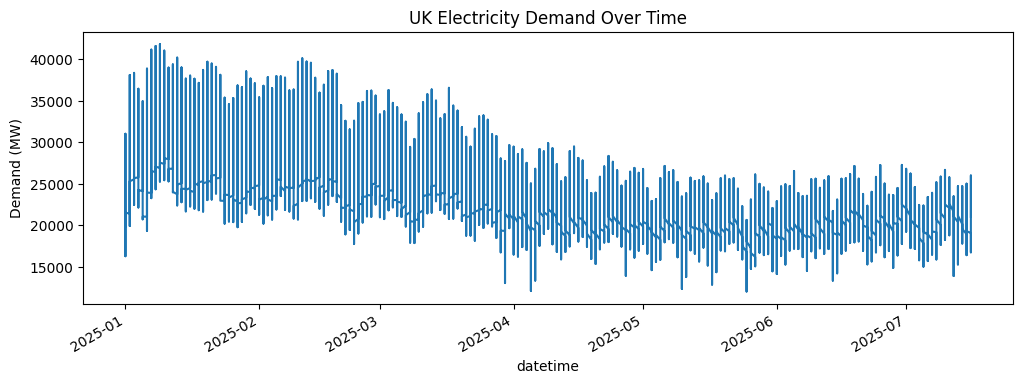

In [6]:
df['ENGLAND_WALES_DEMAND'].plot(figsize=(12, 4), title ='UK Electricity Demand Over Time') 
plt.ylabel('Demand (MW)')

Text(0, 0.5, 'Demand (MW)')

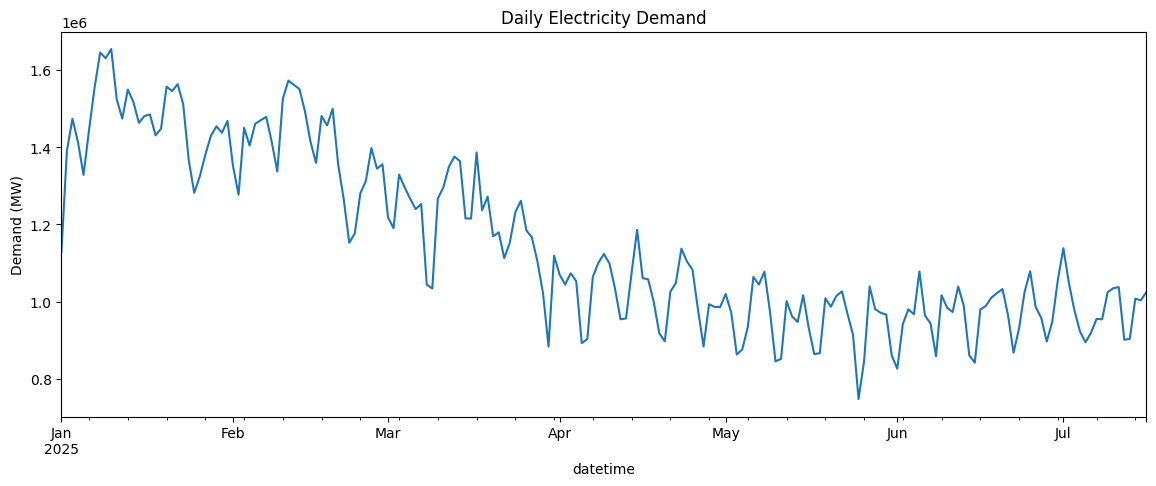

In [7]:
df_daily = df.resample('D').sum()
#resampling to daily rather than like half hourly
df_daily["ENGLAND_WALES_DEMAND"].plot(figsize=(14,5), title='Daily Electricity Demand')
plt.ylabel('Demand (MW)')

<Axes: title={'center': 'Average Demand by Day of Week'}, xlabel='weekday'>

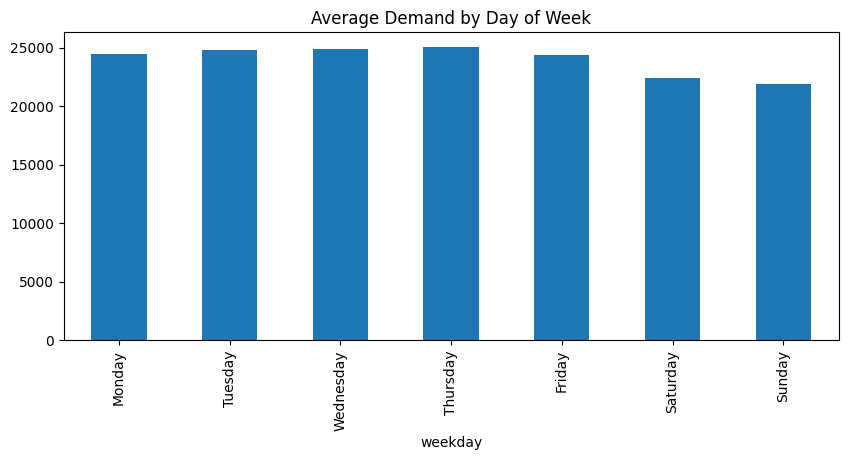

In [8]:
df['weekday'] = df.index.day_name()
df.groupby('weekday')['ENGLAND_WALES_DEMAND'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).plot(kind='bar', figsize=(10, 4), title='Average Demand by Day of Week')

<Axes: xlabel='datetime'>

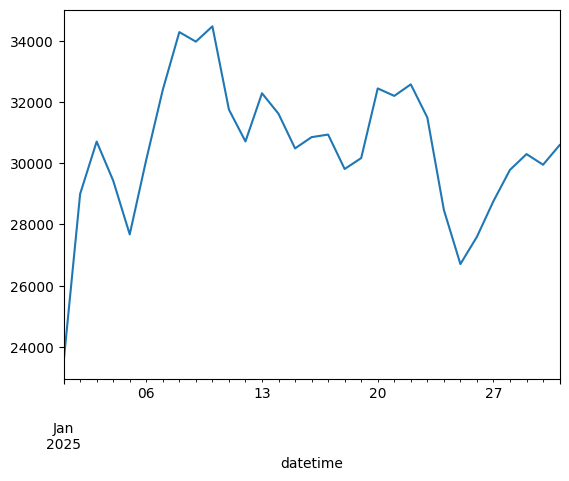

In [9]:
#shortening time period and using average instead of sum
df_onemonth = df[['ENGLAND_WALES_DEMAND']].resample('D').mean().loc['2025-01']
df_onemonth["ENGLAND_WALES_DEMAND"].plot()

<Axes: xlabel='datetime'>

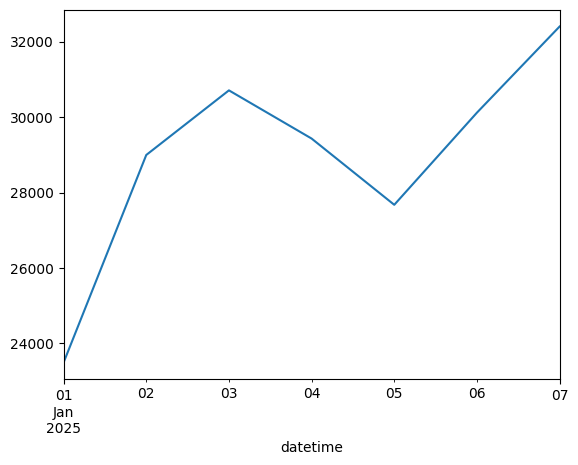

In [10]:
df_oneweek = df[['ENGLAND_WALES_DEMAND']].resample('D').mean().loc['2025-01-01':'2025-01-07']
df_oneweek["ENGLAND_WALES_DEMAND"].plot()

In [11]:
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='30min')
missing = date_range.difference(df.index)
print(f"Missing timestamps: {len(missing)}")


Missing timestamps: 9212


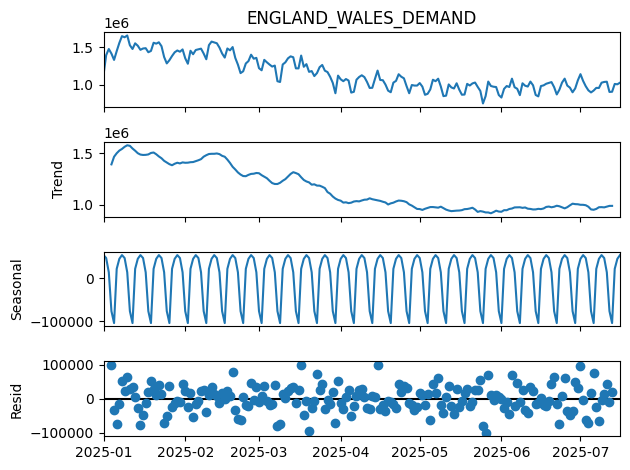

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_daily['ENGLAND_WALES_DEMAND'], model='additive', period=7)
decomposition.plot()
plt.show()

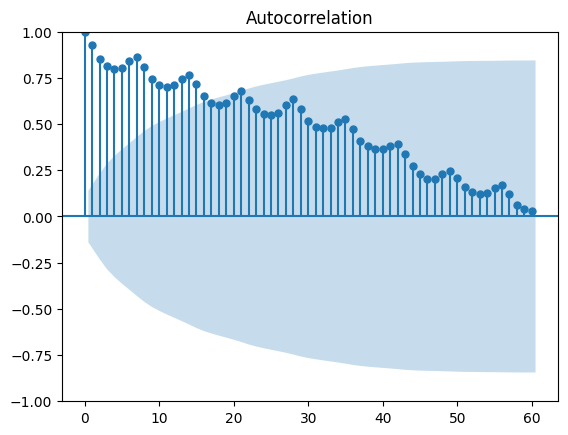

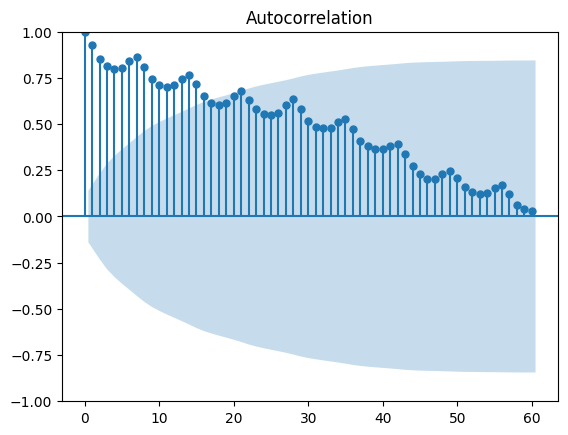

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_daily['ENGLAND_WALES_DEMAND'].dropna(), lags=60)


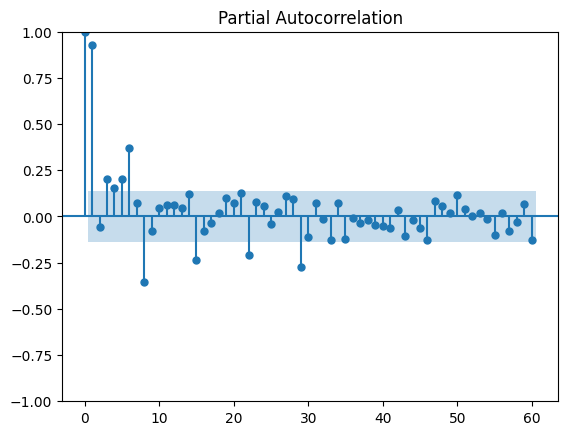

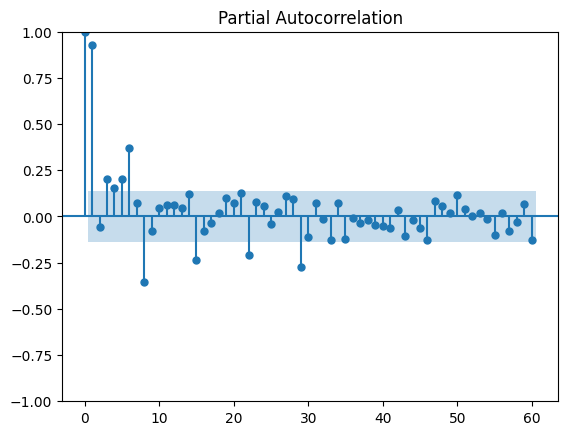

In [14]:
plot_pacf(df_daily['ENGLAND_WALES_DEMAND'].dropna(), lags=60)


In [15]:
# Yesterday's demand
df_daily['lag1'] = df_daily['ENGLAND_WALES_DEMAND'].shift(1)

# Demand 7 days ago
df_daily['lag7'] = df_daily['ENGLAND_WALES_DEMAND'].shift(7)

# Rolling averages (smooth history)
df_daily['roll3'] = df_daily['ENGLAND_WALES_DEMAND'].rolling(3).mean()
df_daily['roll7'] = df_daily['ENGLAND_WALES_DEMAND'].rolling(7).mean()

df_daily.head(10)


,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW,VIKING_FLOW,GREENLINK_FLOW,lag1,lag7,roll3,roll7
datetime,,,,,,,,,,,,,,,,,,,,,
2025-01-01,2025-01-012025-01-012025-01-012025-01-012025-0...,1176,1220564,1362706,1127794,173244,317088,4084,920640,0,...,-19863,20721,33257,0,30914,0,NaN,NaN,NaN,NaN
2025-01-02,2025-01-022025-01-022025-01-022025-01-022025-0...,1176,1515273,1593268,1391757,80303,317088,49682,920640,0,...,-22951,31927,67057,0,62416,0,1127794.0,NaN,NaN,NaN
2025-01-03,2025-01-032025-01-032025-01-032025-01-032025-0...,1176,1611248,1695232,1473925,69292,317088,46686,920640,0,...,-24365,32757,67061,0,68200,0,1391757.0,NaN,1.331159e+06,NaN
2025-01-04,2025-01-042025-01-042025-01-042025-01-042025-0...,1176,1554406,1623480,1412632,49016,317088,11337,920640,0,...,-19913,39932,67064,0,41421,0,1473925.0,NaN,1.426105e+06,NaN
2025-01-05,2025-01-052025-01-052025-01-052025-01-052025-0...,1176,1475393,1536168,1328385,117946,317088,4453,920640,0,...,-9413,41159,67060,0,58571,0,1412632.0,NaN,1.404981e+06,NaN
2025-01-06,2025-01-062025-01-062025-01-062025-01-062025-0...,1176,1596686,1677618,1445573,171850,317088,18170,920640,0,...,-20748,46342,62993,0,20227,-266,1328385.0,NaN,1.395530e+06,NaN
2025-01-07,2025-01-072025-01-072025-01-072025-01-072025-0...,1176,1690219,1781944,1555124,134030,317088,43830,920640,4,...,-24074,47979,67062,0,32300,-10056,1445573.0,NaN,1.443027e+06,1.390741e+06
2025-01-08,2025-01-082025-01-082025-01-082025-01-082025-0...,1176,1803557,1883993,1645561,61763,317088,12446,920640,0,...,-20698,43920,67063,0,35569,-106,1555124.0,1127794.0,1.548753e+06,1.464708e+06
2025-01-09,2025-01-092025-01-092025-01-092025-01-092025-0...,1176,1795075,1890310,1630578,76727,317088,55339,920640,0,...,-23091,26290,47582,0,9105,-26,1645561.0,1391757.0,1.610421e+06,1.498825e+06


In [16]:
# Weekday name & number
df_daily['weekday'] = df_daily.index.weekday  # 0=Mon, 6=Sun
df_daily['is_weekend'] = (df_daily['weekday'] >= 5).astype(int)

# Month & season

# Rough season buckets from month 1=Winter, 2=Spring, 3=Summer, 4=Autumn
# Formula: shift months so Dec->winter, then integer-divide by 3
df_daily['month'] = df_daily.index.month
df_daily['season'] = ((df_daily['month'] % 12 + 3) // 3)  # 1=Winter, 2=Spring, 3=Summer, 4=Autumn

#Extracts time of year signals that can drive demand (work/weekend cold/warm months)

In [26]:
import holidays
years = df_daily.index.year.unique()
uk_holidays = holidays.country_holidays('GB', years=years)  # Great Britain national holidays
# is_holiday: 1 if the date is in the holiday set, else 0
#df_daily['is_holiday'] = df_daily.index.normalize().isin(uk_holidays).astype(int)
# Cast index to pure dates so types match
df_daily['is_holiday'] = pd.Series(df_daily.index.date, index=df_daily.index).isin(uk_holidays).astype(int)
df_daily[df_daily['is_holiday'] == 1]

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,GREENLINK_FLOW,lag1,lag7,roll3,roll7,weekday,is_weekend,month,season,is_holiday
datetime,,,,,,,,,,,,,,,,,,,,,
2025-01-01,2025-01-012025-01-012025-01-012025-01-012025-0...,1176,1220564,1362706,1127794,173244,317088,4084,920640,0,...,0,NaN,NaN,NaN,NaN,2,0,1,1,1
2025-04-18,2025-04-182025-04-182025-04-182025-04-182025-0...,1176,1110690,1173556,999165,110140,317088,83719,933600,0,...,-14497,1057540.0,1034066.0,1.039151e+06,1.041137e+06,4,0,4,2,1
2025-05-05,2025-05-052025-05-052025-05-052025-05-052025-0...,1176,1044440,1133401,934193,63497,317088,140628,898560,0,...,-24680,876039.0,993190.0,8.910107e+05,9.480441e+05,0,0,5,2,1
2025-05-26,2025-05-262025-05-262025-05-262025-05-262025-0...,1176,913130,1149638,845284,170506,317088,122012,933648,0,...,-21828,747397.0,1008456.0,8.355837e+05,9.289679e+05,0,0,5,2,1


In [31]:
#Training a SARIMA model which predicts electricity demand by looking at yesterday last week and seasonal patterns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Splitting the data into "training" (past) and "validation" (future)

split_date = df_daily.index[int(len(df_daily)*0.8)] #take 80% past, 20% future
train = df_daily.loc[:split_date].copy()            #everything up to split date
valid = df_daily.loc[split_date:].copy()            #everything after split date

# Define the SARIMA model

sarima = SARIMAX(
    endog=train['ENGLAND_WALES_DEMAND'],          # the demand series we want to predict
    order=(1,1,1),                # (p,d,q): handles short-term patterns + trend
    seasonal_order=(1,1,1,7),     # (P,D,Q,s): handles weekly seasonality (7 days)
    enforce_stationarity=False,   # don’t force strict mathematical rules
    enforce_invertibility=False   # same idea: more flexibility for learning
)

# p = how many past values to look at
# d = how many times to subtract previous values to remove trends
# q = how much it should use past forecast errors to improve itself

# Train (fit) the model on the training data

sarima_fit = sarima.fit(disp=False) #.fit() means: learn patterns from the training period

# Forecast into the validation period

sarima_forecast = sarima_fit.predict(
    start=valid.index[0],  # first date of the validation set
    end=valid.index[-1]    # last date of the validation set
)

# Measure how good the forecast is

sarima_mae = mean_absolute_error(valid['ENGLAND_WALES_DEMAND'], sarima_forecast)
print(f"SARIMA MAE: {sarima_mae} MW")

SARIMA MAE: 77526.97677743444 MW


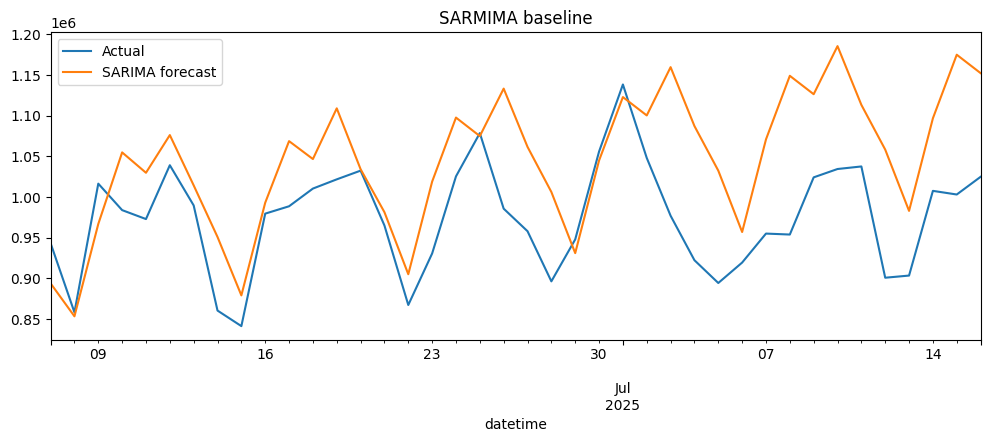

In [33]:
ax = valid['ENGLAND_WALES_DEMAND'].plot(figsize=(12,4), label='Actual') #plot predicted
sarima_forecast.plot(ax=ax, label='SARIMA forecast')                    #plot real
plt.legend()
plt.title('SARMIMA baseline')
plt.show()